# Analyse en composantes principales (PCA)

L'objectif de ce notebook est d'étudier l'une des méthodes de Machine Learning en **apprentissage non supervisé** : **l'analyse en composantes principales - ACP - ou PCA en anglais)**. 

Afin de bien **comprendre les notions sous-jacentes à cette méthode**, nous avez regardé la vidéo suivante : https://www.youtube.com/watch?v=8qw0bNfK4H0

Après avoir défini les concepts de base sur lesquels repose la PCA,nous allons appliquer cette méthode à un jeu de données réelles puis interpréter les résultats en sortie.

## 1. Définitions

(Durée moyenne : 30 min)



1. Définir une méthode d'analyse factorielle

L'analyse factorielle est un terme qui désigne aujourd'hui plusieurs méthodes d'analyses de grands tableaux rectangulaires de données, visant à déterminer et à hiérarchiser des facteurs corrélés aux données placées en colonnes

2. Définir une PCA. Sur quel type de données peut-elle être appliquée? Citer des exemples d'utilisation de la PCA

L'analyse factorielle est de trouver les variables indépendantes soujacentes aux variables observées et donc de trouver une combinaison linéaire entre toutes les variables observées, donc les coefficients sont des variables indépendantes.

PCA est une méthode de l'analyse factorielle, qui est la projection des points des variables observées sur des composantes princpales qui va nous permettre de réduire les dimensions et donc de mieux interpréter les données

Factoriel : combinaison de facteurs initials, donc de trouver des nouveaux composants(nouvelles variables) qui sont une combinaison de variables initialles, donc un résumé de variables initiales.


Au début on a une dimension p très grand, on passe  une dimension plus faible, les axes sont des combinaisons des facteurs initials, donc de taille réduite.


3. Quelle est la matrice en entrée de l'ACP? Quelle(s) transformation(s) peuvent être appliquées à cette matrice? Justifier

PCA prend en entrée une matrice de donnée quantive et dimension n  et on applique une transformation linéaire pour réduire à une dimension k où k est plus petit que n.

Projection des points de variables observées

Transformation de réduction de la moyenne, on centre par rapport à la moyenne  et on va réduire nos données par rapport à l'écart-type. On trvaille sur des données standarisées ou normalisées.


4. Quelle décomposition (ou factorisation) matricielle est utilisée pour l'ACP? Définir l'inertie. Que vaut l'inertie totale lorsque les variables sont centrées et réduites (on parle d'ACP normée)? 

- Manière 1
Utiliser la valeur singulière, de cette matrice centre réduite, donc la matrice diagonale au millieu  va constituer tout sa diagonale va être constituer des valeurs propres, plus précisement la racine carrée des valeurs propres, ces valeur propres c'est ce  qui va matérialise par la notion d'inertie.

- Manière 2
Diagonaliser la matrice de variance co-variance toujours cette matrice centre réduite.

**L'inertie**: la variance des variables, co-variance

5. Définir une composante principale. Quelles sont ses propriétés?

C'est une variable indépendante à partir des anciennes variables pour supprimer des variables qui sont moins importantes pour optimiser la variance.

Ce sont des combinaisons linéaires

La variance de la composante principale (pour le premier  axe c'est son inertie) 

Notion de l'inertie est la variance.

6. Lister des outils d'aide à l'interprétation des résultats

## 2. PCA sur un jeu de données réelles

(Durée moyenne : 2 heures)

L’objectif de cette partie est de mettre en pratique à l'aide de Python la méthode ACP sur un jeu de données réel. Nous allons effectuer pas à pas les différentes étapes de calcul en portant une attention particulière à l'interprétation des résultats pour résumer les relations entre les variables et les individus.

Nous allons nous intéresser au jeu de données sur les performances des athlètes de décathlon à 2 compétitions (JO et Décastar en 2004).Ils participent à 10 épreuves (100m, longueur, poids, hauteur, 400m, 110haies,disque, perche, javelot, 1500m).
Pour ces deux compétitions, on dispose, pour chaque athlète présent, de **ses performances à chacune des 10 épreuves** (les épreuves de vitesse sont mesurées en seconde, les autres en mètres), de son **nombre de points** (à chaque épreuve, un athlète gagne des points en fonction de sa performance) et de son **classement final**. 

L'objectif de l'ACP sur ce jeu de données est de répondre à différentes questions :
- Etude des individus (i.e. des athlètes) :  Y a-t-il des similarités entre les individus pour toutes les variables ? Peut-on établir des profils d'athlètes ? Peut-on opposer un groupe d'individus à un autre ?

- Etude des variables (i.e. des performances) : on étudie les liaisons linéaires entre les variables. Les objectifs sont de résumer la matrice des corrélations et de chercher des variables synthétiques: peut-on résumer les performances des athlètes par un petit nombre de variables ?

- Lien entre les deux études : peut-on caractériser des groupes d'individus par des variables ?

1. Charger le fichier de données et afficher sa dimension

In [102]:
import pandas as pd
import numpy as np
data = pd.read_csv("Donnees_decathlon.txt", sep="\t")

In [103]:
print(data.head())
print(data.shape)

100m  Long  Poids  Haut   400m  110m.haies  Disque  Perche  Javelot  \
Sebrle   10.85  7.84  16.36  2.12  48.36       14.05   48.72     5.0    70.52   
Clay     10.44  7.96  15.23  2.06  49.19       14.13   50.11     4.9    69.71   
Karpov   10.50  7.81  15.93  2.09  46.81       13.97   51.65     4.6    55.54   
Macey    10.89  7.47  15.73  2.15  48.97       14.56   48.34     4.4    58.46   
Warners  10.62  7.74  14.48  1.97  47.97       14.01   43.73     4.9    55.39   

          1500m  Classement  NbPoints Competition  
Sebrle   280.01           1      8893    OlympicG  
Clay     282.00           2      8820    OlympicG  
Karpov   278.11           3      8725    OlympicG  
Macey    265.42           4      8414    OlympicG  
Warners  278.05           5      8343    OlympicG  
(41, 13)


2. Etude exploratoire des variables

Afficher le type des variables. Afficher les statistiques descriptives de chaque variable. Analyser les boxplot des variables quantitatives. Construire la matrice des corrélations entre les variables quantitatives avec la librairie `seaborn`. Interpréter les résultats

In [154]:
import seaborn as sns
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, Sebrle to BOURGUIGNON
Data columns (total 13 columns):
100m           41 non-null float64
Long           41 non-null float64
Poids          41 non-null float64
Haut           41 non-null float64
400m           41 non-null float64
110m.haies     41 non-null float64
Disque         41 non-null float64
Perche         41 non-null float64
Javelot        41 non-null float64
1500m          41 non-null float64
Classement     41 non-null int64
NbPoints       41 non-null int64
Competition    41 non-null object
dtypes: float64(10), int64(2), object(1)
memory usage: 5.7+ KB
None


In [105]:
data.describe()

,100m,Long,Poids,Haut,400m,110m.haies,Disque,Perche,Javelot,1500m,Classement,NbPoints
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,10.998049,7.260000,14.477073,1.976829,49.616341,14.605854,44.325610,4.762439,58.316585,279.024878,12.121951,8005.365854
std,0.263023,0.316402,0.824428,0.088951,1.153451,0.471789,3.377845,0.278000,4.826820,11.673247,7.918949,342.385145
min,10.440000,6.610000,12.680000,1.850000,46.810000,13.970000,37.920000,4.200000,50.310000,262.100000,1.000000,7313.000000
25%,10.850000,7.030000,13.880000,1.920000,48.930000,14.210000,41.900000,4.500000,55.270000,271.020000,6.000000,7802.000000
50%,10.980000,7.300000,14.570000,1.950000,49.400000,14.480000,44.410000,4.800000,58.360000,278.050000,11.000000,8021.000000
75%,11.140000,7.480000,14.970000,2.040000,50.300000,14.980000,46.070000,4.920000,60.890000,285.100000,18.000000,8122.000000
max,11.640000,7.960000,16.360000,2.150000,53.200000,15.670000,51.650000,5.400000,70.520000,317.000000,28.000000,8893.000000


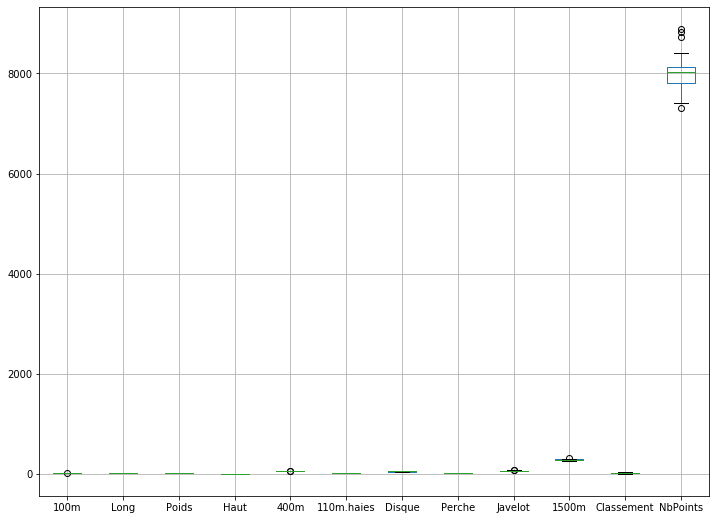

In [106]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,9))
boxPlt = data.boxplot(column=['100m','Long','Poids','Haut','400m','110m.haies','Disque','Perche','Javelot','1500m','Classement','NbPoints'])

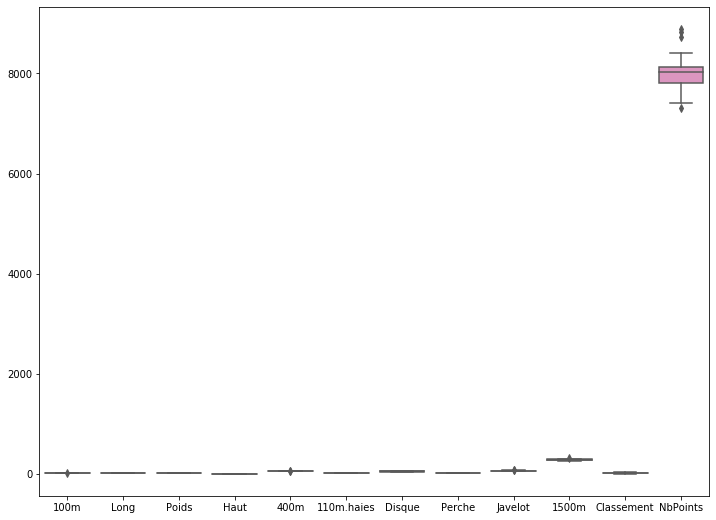

In [108]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
ax = sns.boxplot(data=data, palette="Set2")

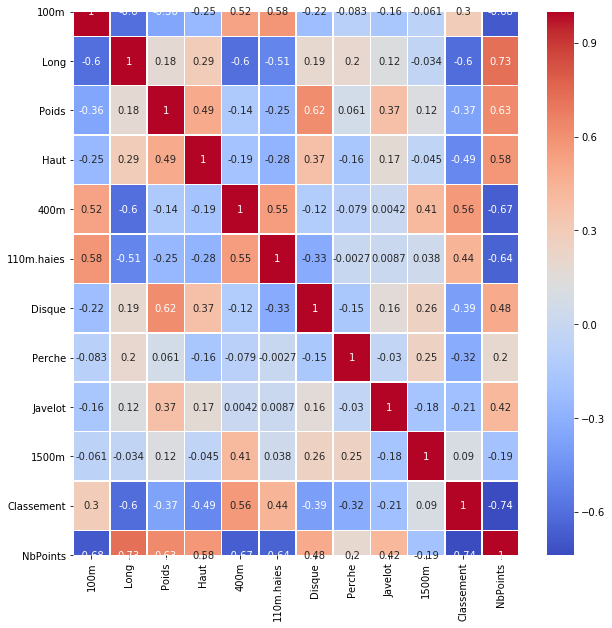

In [109]:
corr = data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot= True,linewidth=0.5,cmap='coolwarm')

3. Standardiser (centrer et réduire) les données des 10 épreuves à l'aide de `sklearn.preprocessing.StandardScaler`. On appelera **Z la table en sortie**.
   Contrôler après cette opération la moyenne et la variance de chaque variable.

In [173]:
from sklearn.preprocessing import StandardScaler
X = data.iloc[:,:-2]
std = StandardScaler()
Z = std.fit_transform(X)

df_Z = pd.DataFrame(Z, columns=data.columns.values[: -2])
df_Z['Competition'] = data['Competition'].values
df_Z.describe()

,100m,Long,Poids,Haut,400m,110m.haies,Disque,Perche,Javelot,1500m,Classement
count,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,6.590934e-15,-2.274603e-15,-1.635548e-15,-2.003817e-16,-7.305809e-15,-2.783681e-15,-7.311225e-16,-8.854706e-16,2.131087e-15,-2.924490e-15,1.445321e-16
std,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-2.148030e+00,-2.079872e+00,-2.206861e+00,-1.443554e+00,-2.463221e+00,-1.364493e+00,-1.919918e+00,-2.048297e+00,-1.679377e+00,-1.467898e+00,-1.421921e+00
25%,-5.698664e-01,-7.359546e-01,-7.332243e-01,-6.468231e-01,-6.024251e-01,-8.494714e-01,-7.270147e-01,-9.557533e-01,-6.390196e-01,-6.942645e-01,-7.826800e-01
50%,-6.947300e-02,1.279921e-01,1.141170e-01,-3.053671e-01,-1.898902e-01,-2.700722e-01,2.529382e-02,1.367900e-01,9.106195e-03,-8.455135e-02,-1.434394e-01
75%,5.463958e-01,7.039566e-01,6.053294e-01,7.190008e-01,6.000702e-01,8.028892e-01,5.228365e-01,5.738073e-01,5.397723e-01,5.268964e-01,7.514975e-01
max,2.470986e+00,2.239862e+00,2.312292e+00,1.971006e+00,3.145498e+00,2.283576e+00,2.195299e+00,2.321877e+00,2.559659e+00,3.293589e+00,2.029979e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C64E39AC88>,
      dtype=object)

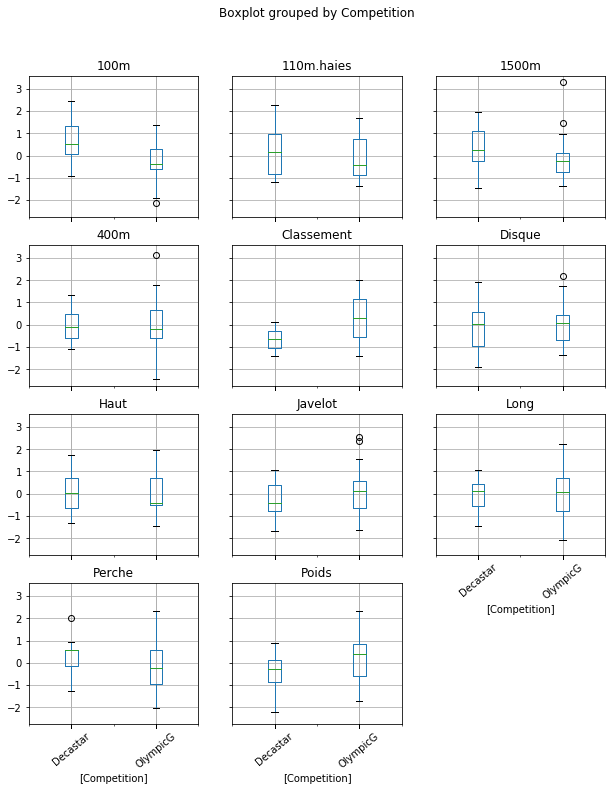

In [175]:
df_Z.boxplot(by='Competition', rot=40, figsize=(10,12))

In [172]:
print(data['Competition'].unique())

['OlympicG' 'Decastar']


4. Afficher la DocString de `sklearn.decomposition.PCA` . Commenter la sortie.
   
   Réaliser la PCA de la matrice Z générée à l'étape précédente. Afficher le nombre par défaut de composantes principales.

In [179]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(Z)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)


[0.34608383 0.1581948  0.12817131 0.10080032 0.07808188 0.05521005
 0.04608229 0.03736379 0.02110516 0.01657518 0.01233138]
[12.49335051  8.44664764  7.60297709  6.74247318  5.93421686  4.98996318
  4.55885008  4.10500562  3.08519501  2.73411873  2.35827274]


5. Afficher les valeurs propres associées à chaque composante (en nombre, pourcentage, pourcentage cumulé). Tracer le **scree Plot** des valeurs propres cumulées et non cumulées. Interpréter les résultats et sélectionner le nombre de composantes principales à retenir pour cette analyse. 

   **Bonus** : Diagonaliser la matrice de Variance-Covariance de Z et comparer les valeurs propres avec ceux en sortie de `PCA `

Nombre de composants :  11
[[-0.36487302  0.38992698  0.30789697  0.30070242 -0.35793103 -0.36884763
   0.27778045  0.06591664  0.1421425  -0.03657107 -0.40297646]
 [ 0.11904949 -0.25191367  0.46439239  0.27297724  0.42005245  0.15488887
   0.46937846 -0.15277415  0.24385213  0.35590139  0.04437902]
 [-0.11267772  0.13826628 -0.02434085 -0.21701624  0.12777315 -0.04266229
   0.02637874  0.60946804 -0.31455526  0.65280115 -0.07148504]
 [ 0.18599699  0.03596387  0.12638486 -0.03787267  0.04505719  0.36405225
  -0.23405979  0.53735106  0.58513136 -0.21007036 -0.28653384]
 [ 0.557715   -0.06603144 -0.09079162  0.42695384 -0.06935609  0.11694086
   0.10504391  0.09682495 -0.49714214 -0.11257224 -0.44197691]
 [ 0.24027544 -0.27294019  0.18270812 -0.65124351 -0.2737424  -0.14640492
   0.50195391  0.10176787 -0.03685976 -0.20845985 -0.08229896]
 [-0.25023514 -0.45650881  0.52610839  0.20098286 -0.10603269 -0.05753908
  -0.28003268  0.3119865  -0.31114528 -0.24513477  0.25414157]
 [ 0.20515429 

[Text(0, 0.5, '% cumulé de la variance expliquée'),
 Text(0.5, 0, 'Composante principale'),
 Text(0.5, 1.0, 'PCA Scree Plot')]

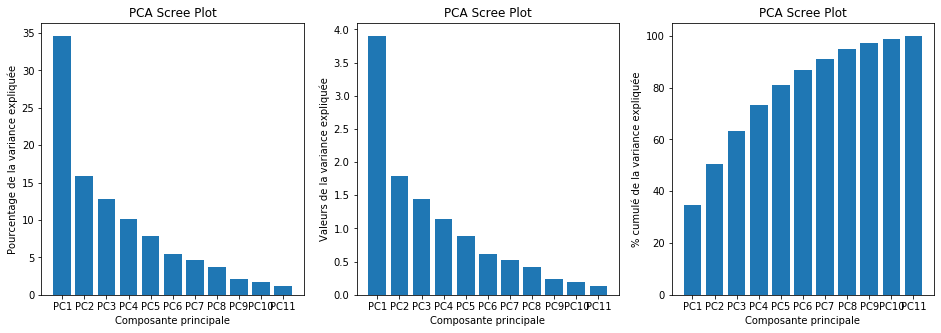

In [194]:
pcs = pca.components_

print("Nombre de composants : ", pca.n_components_)
print(pcs)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)


fig, ax = plt.subplots(1,3, figsize=(16,5))

percent_variance = np.round(pca.explained_variance_ratio_*100, decimals=2)
columns = [f'PC{i}' for i in range(1, pca.explained_variance_ratio_.size+1)]
ax[0].bar(x=range(1, pca.explained_variance_ratio_.size+1), height=percent_variance, tick_label=columns)
ax[0].set(title='PCA Scree Plot', ylabel='Pourcentage de la variance expliquée', xlabel='Composante principale')

ax[1].bar(x=range(1, pca.explained_variance_.size+1), height=pca.explained_variance_, tick_label=columns)
ax[1].set(title='PCA Scree Plot', ylabel='Valeurs de la variance expliquée', xlabel='Composante principale')

ax[2].bar(x=range(1, pca.explained_variance_ratio_.size+1), height=np.cumsum(pca.explained_variance_ratio_*100), tick_label=columns)
ax[2].set(title='PCA Scree Plot', ylabel='% cumulé de la variance expliquée', xlabel='Composante principale')

6. Refaire la PCA en fixant le nombre de composantes à celui retenu à l'étape précédente. Créer un DataFrame contenant les composantes principales.


In [116]:
pca2 = PCA(n_components=2)
pca2.fit(Z)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [200]:
pca2 = PCA(n_components=2)
pca2.fit(Z)
Z_transform = pca2.fit_transform(Z)

print("Composantes / Vecteurs propres :")
print(pca2.components_)
print("Valeurs propres :")
print(pca2.explained_variance_)

pca_df = pd.DataFrame(pca2.components_.T, columns=['PC1', 'PC2'])
pca_df

Composantes / Vecteurs propres :
[[-0.36487302  0.38992698  0.30789697  0.30070242 -0.35793103 -0.36884763
   0.27778045  0.06591664  0.1421425  -0.03657107 -0.40297646]
 [ 0.11904949 -0.25191367  0.46439239  0.27297724  0.42005245  0.15488887
   0.46937846 -0.15277415  0.24385213  0.35590139  0.04437902]]
Valeurs propres :
[3.90209517 1.78364641]


,PC1,PC2
0,-0.364873,0.119049
1,0.389927,-0.251914
2,0.307897,0.464392
3,0.300702,0.272977
4,-0.357931,0.420052
5,-0.368848,0.154889
6,0.277780,0.469378
7,0.065917,-0.152774
8,0.142143,0.243852
9,-0.036571,0.355901


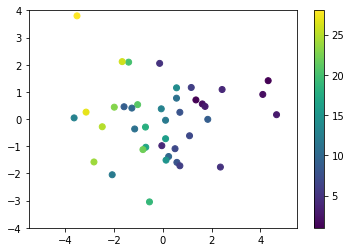

In [203]:
#Colormap
# projeter X sur les composantes principales
X_projected = pca2.transform(Z)

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    # colorer en utilisant la variable 'Classement'
    c=data.get('Classement'))

plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.colorbar()

(-0.7, 0.7)

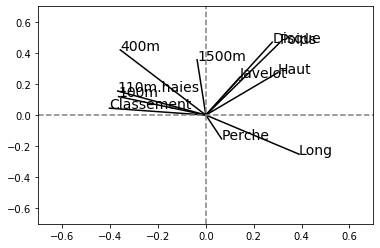

In [204]:
#Diagramme circulaire
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, data.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

7. Représenter graphiquement le nuage des individus dans le plan factoriel des deux premières composantes principales. Afficher les noms des athlètes. Que pouvez vous dire de
    - Bourguignon et Karpov ?
    - Barras et Qi ?
    - Casarsa ?
    - Serble et Clay ?

Text(0.5, 1.0, 'Plan factoriel PC1/PC2')

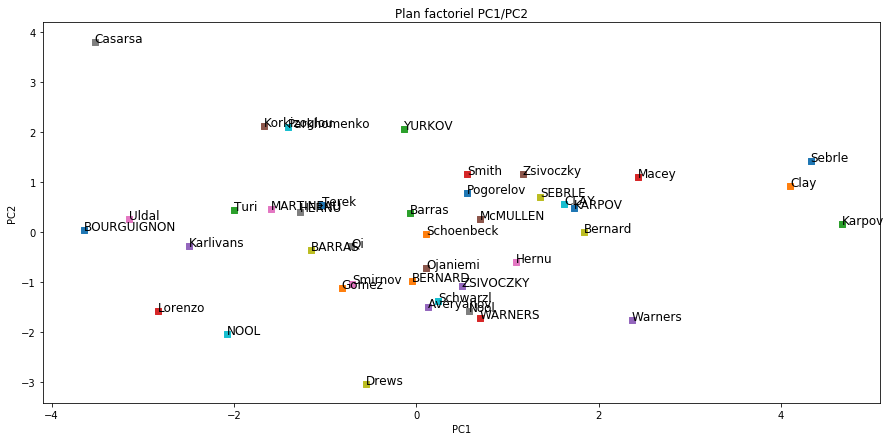

In [209]:
fig = plt.figure(figsize=(15, 7))
for i in range(Z_transform.shape[0]):
    plt.scatter(Z_transform[i,0], Z_transform[i,1], marker="s")
    plt.text(Z_transform[i,0], Z_transform[i,1], data.index[i],
    fontsize='12')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Plan factoriel PC1/PC2")

* Bourguignon et Karpov sont alignés sur l'axe PC1 mais à l'opposé : Karpov est plus sujet à gagner que Bourguignon
* Barras et Qi sont très proches l'un de l'autre donc ils ont autant de chance de gagner
* Casara est à (-4,4) soit aux extrémités : Il a plus de chances de finir dernier dans la compétition avec un bon score
* Sebrie et Clay sont quasi alignés sur l'horizontale à 1 : Ils font un bon score et sont plus sujets à gagner

8.  Calculer la contribution des individus (athlètes) à l'inertie totale. Pour cela, calculer la somme des carrés des distances à l’origine des individus donnée par : 

Pour un individu i, $d_i^2 = \sum_{j=1}^{10}z_{ij}^2$           

$z_{ij}$ : élément i,j de la matrice Z    

Afficher les résultats pour chaque individu i dans un DataFrame. Interpréter les résultats

In [222]:
print(Z.shape)
print(d.shape)
de = np.sum(Z**2, axis=1)
de

(41, 11)
(41,)


array([25.47429854, 23.27376769, 26.4192513 , 12.8696498 ,  9.70159469,
        7.19630417,  3.75656948,  9.87586768,  8.1527502 ,  3.95789427,
        5.6987259 ,  3.22943563,  4.95859584, 12.5632958 ,  6.48950818,
        5.71004179,  4.47423333,  3.67818977, 12.48758694, 13.16439927,
       12.0610961 ,  8.42009284, 11.35011183, 14.62750221, 10.02368182,
       18.9493694 , 12.29528952, 28.33573455,  7.6332544 , 13.97370356,
       12.89560315,  8.71022224,  9.93682071,  6.50715629,  6.99842784,
        6.83804846, 14.16370138,  7.88255083,  3.83041843, 13.94458806,
       18.49066614])

In [217]:
df_Z['PC1'] = Z_transform[:, 0]
df_Z['PC2'] = Z_transform[:, 1]

d = np.sum(Z**2, axis=1)
df_dist = pd.DataFrame({'Individu': data.index, 'DistanceCarree': d})
df_dist

,Individu,DistanceCarree
0,Sebrle,25.474299
1,Clay,23.273768
2,Karpov,26.419251
3,Macey,12.869650
4,Warners,9.701595
5,Zsivoczky,7.196304
6,Hernu,3.756569
7,Nool,9.875868
8,Bernard,8.152750
9,Schwarzl,3.957894


In [101]:
# data['inertie'] = list_inertie
# data.head()

9. En déduire de la question précédente,la qualité de représentation de chaque individu ($cos^2$) sur les axes k = 1 et k = 2 via la formule :

$$cos_{ik}^2 =\frac{{coordonnée\,de\,l'individu\,i\,sur\, l'axe\, k}^2} {d_i^2}$$

Afficher les résultats dans un DataFrame. Commenter 

In [144]:
# data2['qualité de représentation ax1'] = (data['100m'])**2/data2['contribution']

list_representation =  [ (data['100m'][i])**2/data2['contribution'][i]  for i in range(len(data['100m']))]
data2['qualité de représentation ax1'] = list_representation


list_representation2 =  [ (data['Long'][i])**2/data2['contribution'][i]  for i in range(len(data['100m']))]
data2['qualité de représentation ax2'] = list_representation2

In [145]:
data2.head()

,contribution,qualité de représentation ax1,qualité de représentation ax2
0,23.452440,5.019627,2.620862
1,21.599144,5.046200,2.933524
2,25.059172,4.399587,2.434083
3,11.791425,10.057487,4.732329
4,8.872533,12.711635,6.752029


10. Calculer la contribution des individus (CTR) aux axes k = 1 et k = 2

$$CTR{ik} = \frac{{coordonnée\,de\,l'individu\,i\,sur\, l'axe\, k}^2} {n*\lambda_k}$$

$\lambda_k$ est la valeur propre associée à l'axe 1 et n le nombre d'individus

Afficher les résultats dans un DataFrame. Vérifier que la somme des contributions des individus pour un axe donné vaut 1

In [151]:
data2['ctr sur axe1'] = [data['100m'][i]**2/(data2.shape[0]*data2['qualité de représentation ax1'][i]) for i in range(data2.shape[0])]

In [152]:
data2.head()

,contribution,qualité de représentation ax1,qualité de représentation ax2,ctr sur axe1
0,23.452440,5.019627,2.620862,0.572011
1,21.599144,5.046200,2.933524,0.526808
2,25.059172,4.399587,2.434083,0.611199
3,11.791425,10.057487,4.732329,0.287596
4,8.872533,12.711635,6.752029,0.216403


10. on cherche à analyser les variables sur les axes 1 et 2. POur ce faire, afficher les vecteurs propres de la PCA et calculer la racine des valeurs propres des axes 1 et 2

Afficher la matrice de corrélation des variables avec les facteurs. Pour ce faire, calculer les corrélations comme le produit de vecteur propre et la racine de la valeur propre associés à l'axe k (k = 1 et k = 2)

Tracer le nuage des variables dans le cercle des corrélations (afficher le nom des variables) dans le plan factoriel (1,2). Interpréter les résultats.

- Que peut-on dire sur les scores des épreuves du 110m haie et les épreuves du 100m?
- Idem par rapport au saut en longueur ?
- Que peut-on dire sur les scores de l’épreuve du javelot ou du saut à la perche ?

In [153]:
pca.

array([[-0.42829627,  0.41015201,  0.34414444,  0.31619436, -0.3757157 ,
        -0.41255442,  0.30542571,  0.02783081,  0.15319802, -0.03210733],
       [ 0.14198909, -0.26207936,  0.45394697,  0.2657761 ,  0.432046  ,
         0.17359096,  0.4600244 , -0.13684105,  0.24050715,  0.35980486],
       [-0.15557953,  0.15372674, -0.01972378, -0.21894349,  0.11091758,
        -0.07815576,  0.0362377 ,  0.58361717, -0.32874217,  0.65987362],
       [-0.03678703,  0.09901016,  0.18539458, -0.13189684,  0.02850297,
         0.28290068, -0.25259074,  0.5364948 ,  0.69285498, -0.15669648],
       [-0.36518741, -0.04432336, -0.13431954, -0.6712176 ,  0.10597034,
        -0.19857266,  0.1266777 , -0.39873734,  0.3687312 ,  0.18557094],
       [ 0.29607739, -0.30612478,  0.30547299, -0.46777116, -0.33252178,
        -0.09963776,  0.44937288,  0.26166458, -0.16320268, -0.29826888],
       [-0.38177608, -0.62769317,  0.30972542,  0.09145002,  0.12442114,
        -0.3573303 , -0.42988982,  0.09796019

10. Analyser la qualité de représentation des variables ($Cos^2$) dans le plan factoriel (1,2) ainsi que la contribution de chaque variable aux facteurs k = 1 et k = 2

$$ 𝐶𝑂𝑆_{𝑗𝑘}^2={correlation\,de \,la\, variable\, j \,avec \,l'axe \,k}^2$$

$$ 𝐶𝑇𝑅_{𝑗𝑘}=\frac{{correlation\,de \,la\, variable\, j \,avec \,l'axe \,k}^2}{\lambda_𝑘}$$

Créer un DataFrame avec les résultats et les commenter.

11. interpréter le troisième axe factoriel. Que semble t-il représenter?

12. Comment pourrions-nous améliorer notre analyse? (introduction de nouvelles informations par exemple,...)